In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np

# random varaible values and parameter values
df = pd.read_csv('azdiabetes.csv')
X = df[['npreg', 'bp', 'bmi', 'ped', 'age']]
X = (X - X.mean()) / X.std()  # centering and scaling
X['intercept'] = 1
X = X.values
y = df['diabetes'].replace({'Yes': 1, 'No': 0})

/var/folders/dz/lgsl3l_d7fv4z40yrx07rfz80000gn/T/ipykernel_20085/3288299399.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['diabetes'].replace({'Yes': 1, 'No': 0})


In [2]:
from sampler import GibbsSampler

g = len(y)
nu0 = 2
sigma02 = 1

beta_GS, z_GS = GibbsSampler(y, X, g, nu0, sigma02).run_sampler()


In [3]:
from sampler import MetropolisHastingsSampler

mean_beta = np.zeros(6)
cov_beta = np.diag([16, 4, 4, 4, 4, 4])
# Likelihood function
def likelihood(x):
    return np.exp(x) / (1 + np.exp(x))

beta_MH, z_MH = MetropolisHastingsSampler(y, X, likelihood, mean_beta, cov_beta).run_sampler()

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 6.377


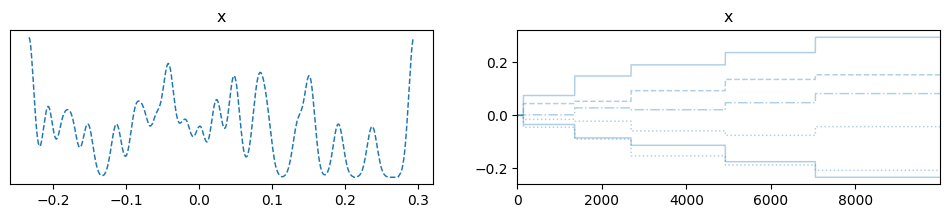

In [9]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

betadata_MH = az.convert_to_dataset(beta_MH.T)

az.plot_trace(betadata_MH, combined=True, compact=True)
print(az.ess(betadata_MH))

plt.show()

In [5]:
from sampler import PolyaGamma

beta_PG, z_PG = PolyaGamma(y, X, likelihood, mean_beta, cov_beta).run_sampler()

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.182


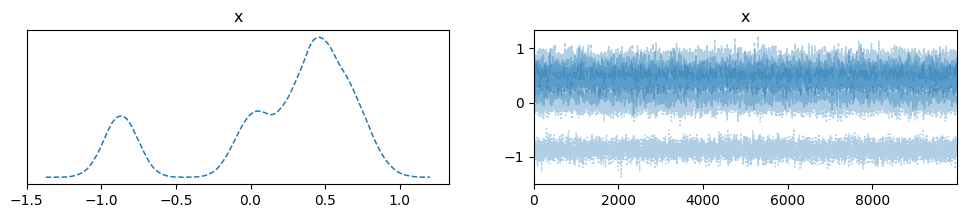

In [10]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

betadata_PG = az.convert_to_dataset(beta_PG.T)

az.plot_trace(betadata_PG, combined=True, compact=True)
print(az.ess(betadata_PG))

plt.show()

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 8.127e+03


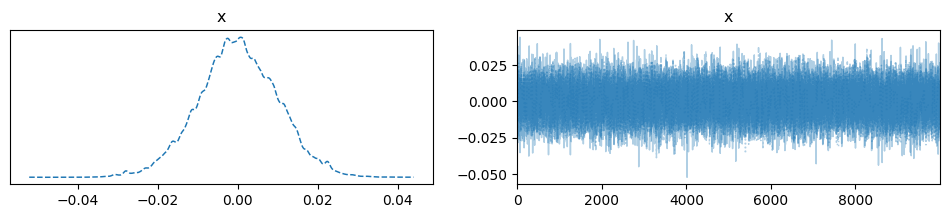

In [11]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

betadata_GS = az.convert_to_dataset(beta_GS.T)

az.plot_trace(betadata_GS, combined=True, compact=True)
print(az.ess(betadata_GS))

plt.show()